In [9]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [28]:
file_path = '../data/2019-Nov.csv'

df = pd.read_csv(
    file_path,
    parse_dates=['event_time'],
    nrows=500000  
)

print(f"Loaded {len(df):,} rows")
df.head()

Loaded 500,000 rows


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     500000 non-null  datetime64[ns, UTC]
 1   event_type     500000 non-null  object             
 2   product_id     500000 non-null  int64              
 3   category_id    500000 non-null  int64              
 4   category_code  337628 non-null  object             
 5   brand          425209 non-null  object             
 6   price          500000 non-null  float64            
 7   user_id        500000 non-null  int64              
 8   user_session   500000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 34.3+ MB


In [30]:
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
df.columns

Rows: 500,000
Columns: 9


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [31]:
df.describe()

,product_id,category_id,price,user_id
count,5.000000e+05,5.000000e+05,500000.000000,5.000000e+05
mean,1.064690e+07,2.057498e+18,289.510458,5.351769e+08
std,1.191713e+07,1.883587e+16,348.069570,2.011139e+07
min,1.000978e+06,2.053014e+18,0.000000,2.749691e+08
25%,1.005197e+06,2.053014e+18,67.915000,5.159156e+08
50%,5.100526e+06,2.053014e+18,167.290000,5.308116e+08
75%,1.570012e+07,2.053014e+18,360.320000,5.542951e+08
max,6.050001e+07,2.180737e+18,2574.070000,5.663943e+08


In [32]:
df['event_type'].value_counts()

event_type
view        482642
purchase      9595
cart          7763
Name: count, dtype: int64

In [33]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    162372
brand             74791
price                 0
user_id               0
user_session          0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(235)

In [35]:
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df):,}")

Rows after removing duplicates: 499,765


In [36]:
df['category_code'] = df['category_code'].fillna('unknown')
df['brand'] = df['brand'].fillna('unknown')

In [37]:
df = df[(df['price'] > 0) & (df['price'] < 50000)]
print(f"Rows after price filter: {len(df):,}")

Rows after price filter: 499,202


In [38]:
df = df.sort_values('event_time').reset_index(drop=True)

In [39]:
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.dayofweek 

In [40]:
print("Cleaned dataset:")
print(f"Total rows: {len(df):,}")
print(f"Unique users: {df['user_id'].nunique():,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
df.head()

Cleaned dataset:
Total rows: 499,202
Unique users: 92,704
Date range: 2019-11-01 to 2019-11-01


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,day_of_week
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01,0,4
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01,0,4
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01,0,4
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01,0,4
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01,0,4


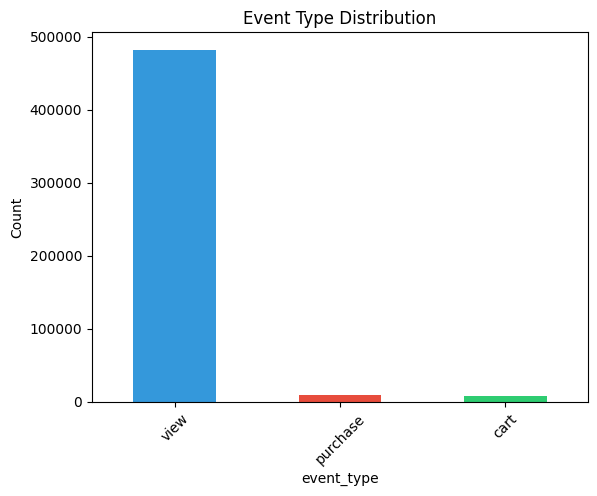

In [41]:
df['event_type'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Event Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

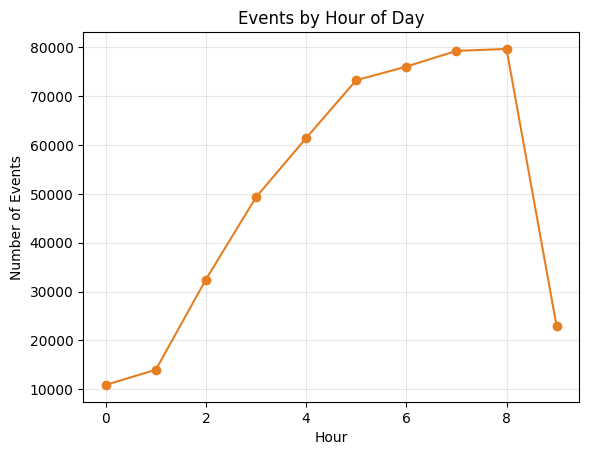

In [42]:
df.groupby('hour').size().plot(kind='line', marker='o', color='#e67e22')
plt.title('Events by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.grid(True, alpha=0.3)
plt.show()

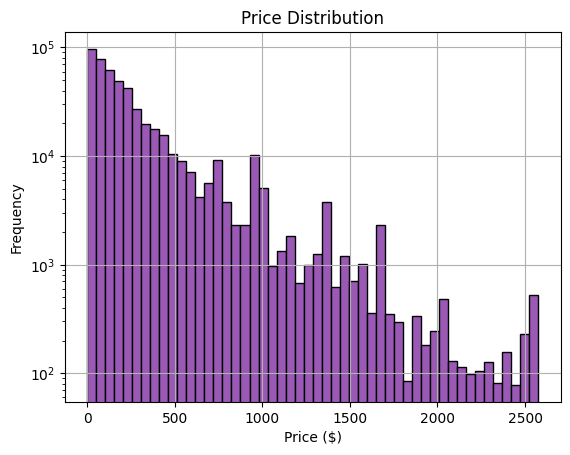

In [43]:
df['price'].hist(bins=50, color='#9b59b6', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

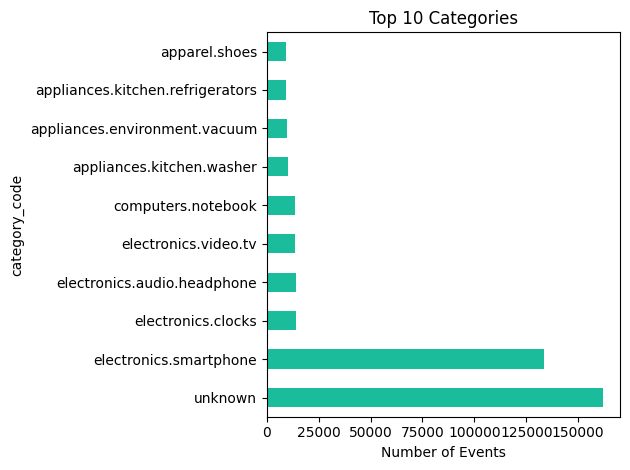

In [44]:
df['category_code'].value_counts().head(10).plot(kind='barh', color='#1abc9c')
plt.title('Top 10 Categories')
plt.xlabel('Number of Events')
plt.tight_layout()
plt.show()

In [45]:
# For each user check if they completed each stage

user_funnel = df.groupby('user_id').agg({
    'event_type': lambda x: list(x),  # All events for this user
    'event_time': ['min', 'max']      # First and last event time
}).reset_index()

user_funnel.columns = ['user_id', 'events', 'first_event', 'last_event']

# Add funnel stage flags
user_funnel['viewed'] = user_funnel['events'].apply(lambda x: 'view' in x)
user_funnel['added_to_cart'] = user_funnel['events'].apply(lambda x: 'cart' in x)
user_funnel['purchased'] = user_funnel['events'].apply(lambda x: 'purchase' in x)

user_funnel.head()

,user_id,events,first_event,last_event,viewed,added_to_cart,purchased
0,274969076,"[view, view, view]",2019-11-01 06:18:48+00:00,2019-11-01 06:52:33+00:00,True,False,False
1,275256741,[view],2019-11-01 02:23:03+00:00,2019-11-01 02:23:03+00:00,True,False,False
2,295643776,"[view, view, view, view, view, view, view, view]",2019-11-01 03:12:38+00:00,2019-11-01 03:15:53+00:00,True,False,False
3,296465302,"[view, view, view, view, view, view, view, vie...",2019-11-01 04:10:21+00:00,2019-11-01 05:11:24+00:00,True,False,False
4,356520186,"[view, view, view, view, view, purchase]",2019-11-01 03:39:27+00:00,2019-11-01 03:49:22+00:00,True,False,True


In [46]:
# Calculate funnel metrics
total_users = len(user_funnel)
viewed = user_funnel['viewed'].sum()
added_to_cart = user_funnel['added_to_cart'].sum()
purchased = user_funnel['purchased'].sum()

print("FUNNEL ANALYSIS")
print("="*50)
print(f"Total Users:           {total_users:>10,}")
print(f"Viewed Product:        {viewed:>10,}  ({viewed/total_users*100:.1f}%)")
print(f"Added to Cart:         {added_to_cart:>10,}  ({added_to_cart/total_users*100:.1f}%)")
print(f"Purchased:             {purchased:>10,}  ({purchased/total_users*100:.1f}%)")
print("="*50)
print("\nCONVERSION RATES")
print("="*50)
print(f"View → Cart:           {added_to_cart/viewed*100:.2f}%")
print(f"Cart → Purchase:       {purchased/added_to_cart*100:.2f}%")
print(f"Overall (View → Buy):  {purchased/viewed*100:.2f}%")


FUNNEL ANALYSIS
Total Users:               92,704
Viewed Product:            92,696  (100.0%)
Added to Cart:              4,501  (4.9%)
Purchased:                  7,389  (8.0%)

CONVERSION RATES
View → Cart:           4.86%
Cart → Purchase:       164.16%
Overall (View → Buy):  7.97%


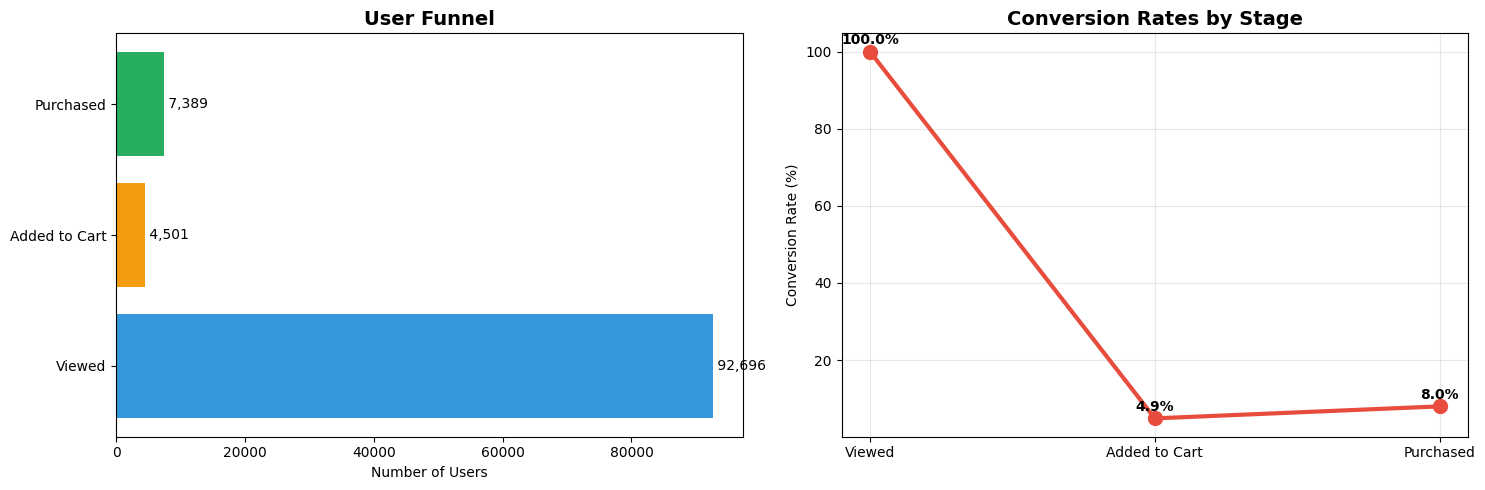

In [47]:
# Visualize the funnel
funnel_data = pd.DataFrame({
    'Stage': ['Viewed', 'Added to Cart', 'Purchased'],
    'Users': [viewed, added_to_cart, purchased],
    'Conversion': [100, added_to_cart/viewed*100, purchased/viewed*100]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Funnel chart
ax1.barh(funnel_data['Stage'], funnel_data['Users'], color=['#3498db', '#f39c12', '#27ae60'])
ax1.set_xlabel('Number of Users')
ax1.set_title('User Funnel', fontweight='bold', fontsize=14)
for i, v in enumerate(funnel_data['Users']):
    ax1.text(v, i, f' {v:,}', va='center')

# Conversion rates
ax2.plot(funnel_data['Stage'], funnel_data['Conversion'], marker='o', linewidth=3, 
         markersize=10, color='#e74c3c')
ax2.set_ylabel('Conversion Rate (%)')
ax2.set_title('Conversion Rates by Stage', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3)
for i, v in enumerate(funnel_data['Conversion']):
    ax2.text(i, v+2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [48]:
# Calculate drop-off rates
view_to_cart_dropoff = (viewed - added_to_cart) / viewed * 100
cart_to_purchase_dropoff = (added_to_cart - purchased) / added_to_cart * 100

print("\nDROP-OFF ANALYSIS")
print("="*50)
print(f"Users who viewed but didn't add to cart:  {view_to_cart_dropoff:.1f}%")
print(f"Users who added to cart but didn't buy:   {cart_to_purchase_dropoff:.1f}%")
print("="*50)



DROP-OFF ANALYSIS
Users who viewed but didn't add to cart:  95.1%
Users who added to cart but didn't buy:   -64.2%


In [49]:
# Identify user segments
user_funnel['segment'] = 'Browsers'  # Default
user_funnel.loc[user_funnel['added_to_cart'], 'segment'] = 'Cart Abandoners'
user_funnel.loc[user_funnel['purchased'], 'segment'] = 'Buyers'

print("\nUSER SEGMENTS")
print("="*50)
print(user_funnel['segment'].value_counts())
print("\nSegment Distribution:")
print(user_funnel['segment'].value_counts(normalize=True) * 100)


USER SEGMENTS
segment
Browsers           83520
Buyers              7389
Cart Abandoners     1795
Name: count, dtype: int64

Segment Distribution:
segment
Browsers           90.09320
Buyers              7.97053
Cart Abandoners     1.93627
Name: proportion, dtype: float64


In [50]:
# Group users by their first interaction hour (cohort)

user_first_event = df.groupby('user_id')['event_time'].min().reset_index()
user_first_event.columns = ['user_id', 'first_event_time']
user_first_event['cohort_hour'] = user_first_event['first_event_time'].dt.hour

# Merge back with main dataframe
df_cohort = df.merge(user_first_event[['user_id', 'cohort_hour']], on='user_id')

df_cohort.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,day_of_week,cohort_hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01,0,4,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01,0,4,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01,0,4,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01,0,4,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01,0,4,0


In [51]:
# Cohort conversion rates by hour
cohort_metrics = df_cohort.groupby('cohort_hour').apply(
    lambda x: pd.Series({
        'total_users': x['user_id'].nunique(),
        'viewed': (x['event_type'] == 'view').any(),
        'added_to_cart': (x['event_type'] == 'cart').sum() > 0,
        'purchased': (x['event_type'] == 'purchase').sum() > 0
    })
).reset_index()

# Calculate conversion rates per cohort
cohort_summary = df_cohort.groupby('cohort_hour')['user_id'].nunique().reset_index()
cohort_summary.columns = ['cohort_hour', 'total_users']

# Get cart and purchase counts
cart_users = df_cohort[df_cohort['event_type'] == 'cart'].groupby('cohort_hour')['user_id'].nunique()
purchase_users = df_cohort[df_cohort['event_type'] == 'purchase'].groupby('cohort_hour')['user_id'].nunique()

cohort_summary['cart_users'] = cohort_summary['cohort_hour'].map(cart_users).fillna(0)
cohort_summary['purchase_users'] = cohort_summary['cohort_hour'].map(purchase_users).fillna(0)

cohort_summary['cart_rate'] = (cohort_summary['cart_users'] / cohort_summary['total_users'] * 100).round(2)
cohort_summary['purchase_rate'] = (cohort_summary['purchase_users'] / cohort_summary['total_users'] * 100).round(2)

print("COHORT ANALYSIS BY HOUR")
print("="*70)
print(cohort_summary)


COHORT ANALYSIS BY HOUR
   cohort_hour  total_users  cart_users  purchase_users  cart_rate  \
0            0         2314          81             118       3.50   
1            1         3156          93             182       2.95   
2            2         6587         295             486       4.48   
3            3         9976         477             864       4.78   
4            4        11650         638            1074       5.48   
5            5        13740         703            1188       5.12   
6            6        13662         733            1140       5.37   
7            7        14033         660            1121       4.70   
8            8        13632         657             999       4.82   
9            9         3954         164             217       4.15   

   purchase_rate  
0           5.10  
1           5.77  
2           7.38  
3           8.66  
4           9.22  
5           8.65  
6           8.34  
7           7.99  
8           7.33  
9           5.4

/var/folders/0h/hy52hbmn49g7zxhwryqpqfs40000gn/T/ipykernel_46441/432113396.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cohort_metrics = df_cohort.groupby('cohort_hour').apply(


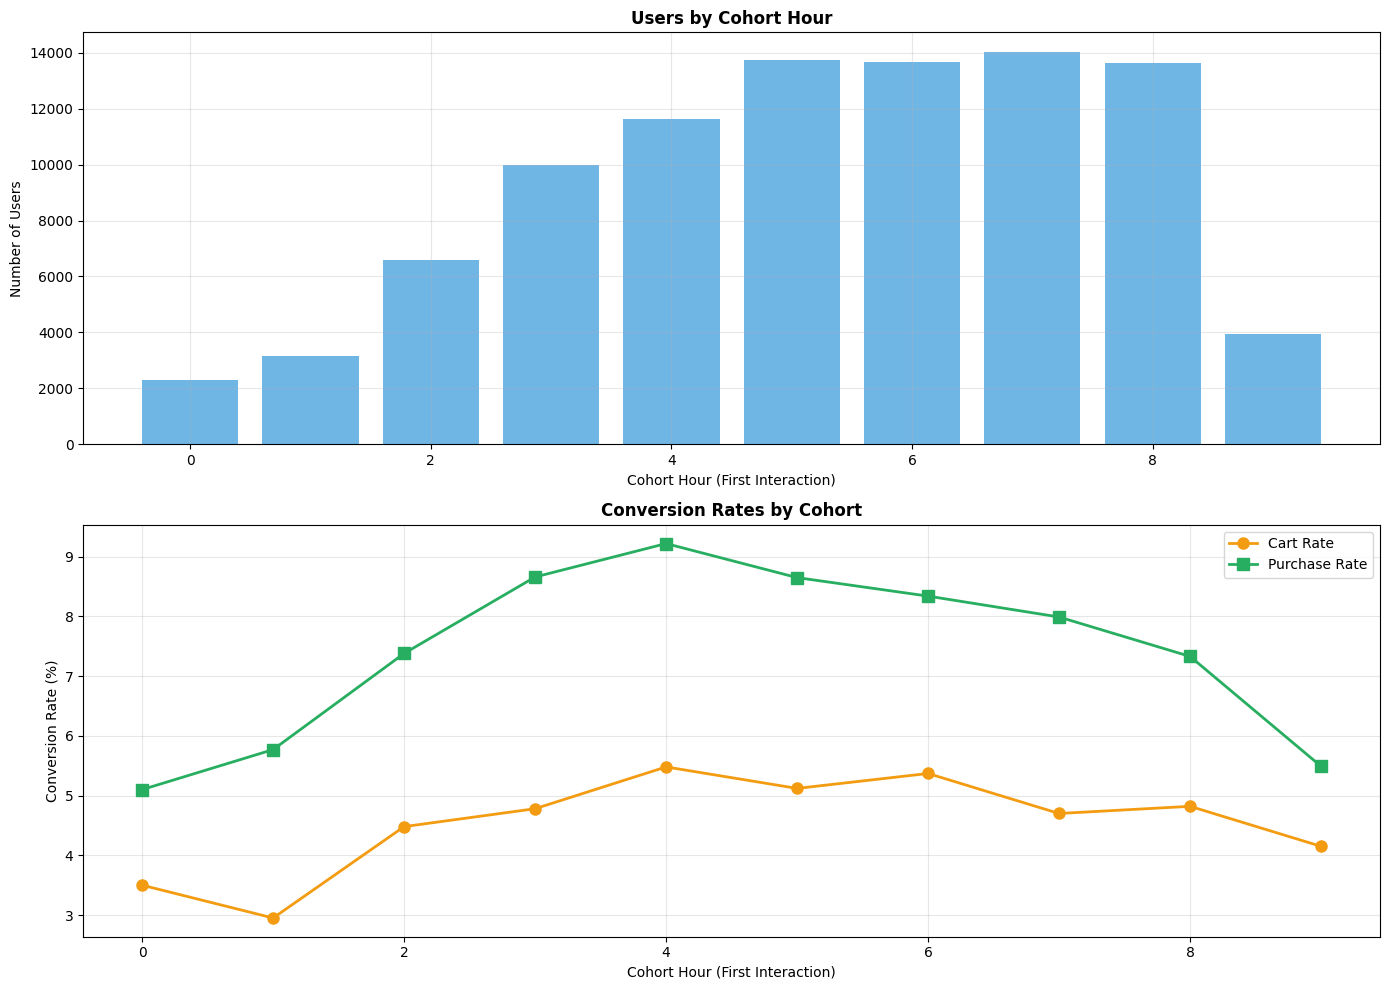

In [52]:
# CELL Visualize cohort performance
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Chart 1: Users per cohort
axes[0].bar(cohort_summary['cohort_hour'], cohort_summary['total_users'], 
            color='#3498db', alpha=0.7)
axes[0].set_xlabel('Cohort Hour (First Interaction)')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Users by Cohort Hour', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Chart 2: Conversion rates by cohort
axes[1].plot(cohort_summary['cohort_hour'], cohort_summary['cart_rate'], 
             marker='o', label='Cart Rate', linewidth=2, markersize=8, color='#f39c12')
axes[1].plot(cohort_summary['cohort_hour'], cohort_summary['purchase_rate'], 
             marker='s', label='Purchase Rate', linewidth=2, markersize=8, color='#27ae60')
axes[1].set_xlabel('Cohort Hour (First Interaction)')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_title('Conversion Rates by Cohort', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [54]:
# Find best and worst performing cohorts
best_cohort = cohort_summary.loc[cohort_summary['purchase_rate'].idxmax()]
worst_cohort = cohort_summary.loc[cohort_summary['purchase_rate'].idxmin()]

print("\n" + "="*70)
print("COHORT INSIGHTS")
print("="*70)
print(f"\n BEST PERFORMING COHORT:")
print(f"   Hour: {int(best_cohort['cohort_hour'])}:00")
print(f"   Users: {int(best_cohort['total_users']):,}")
print(f"   Purchase Rate: {best_cohort['purchase_rate']:.2f}%")

print(f"\n WORST PERFORMING COHORT:")
print(f"   Hour: {int(worst_cohort['cohort_hour'])}:00")
print(f"   Users: {int(worst_cohort['total_users']):,}")
print(f"   Purchase Rate: {worst_cohort['purchase_rate']:.2f}%")

print(f"\n DIFFERENCE:")
print(f"   Performance Gap: {(best_cohort['purchase_rate'] - worst_cohort['purchase_rate']):.2f}%")
print("="*70)


COHORT INSIGHTS

 BEST PERFORMING COHORT:
   Hour: 4:00
   Users: 11,650
   Purchase Rate: 9.22%

 WORST PERFORMING COHORT:
   Hour: 0:00
   Users: 2,314
   Purchase Rate: 5.10%

 DIFFERENCE:
   Performance Gap: 4.12%


/var/folders/0h/hy52hbmn49g7zxhwryqpqfs40000gn/T/ipykernel_46441/1943878119.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_conversion = df.groupby('category_code').apply(



TOP 10 CATEGORIES BY PURCHASE RATE
                      category_code  unique_users  purchase_rate
             electronics.smartphone       31353.0      13.896597
appliances.environment.water_heater         393.0      11.195929
    appliances.personal.hair_cutter         160.0       9.375000
        electronics.audio.headphone        4326.0       9.130837
           appliances.ironing_board         107.0       8.411215
  appliances.environment.air_heater         172.0       8.139535
         appliances.personal.scales         210.0       8.095238
                  kids.fmcg.diapers         150.0       8.000000
               electronics.video.tv        3260.0       7.914110
                      kids.carriage         625.0       7.680000


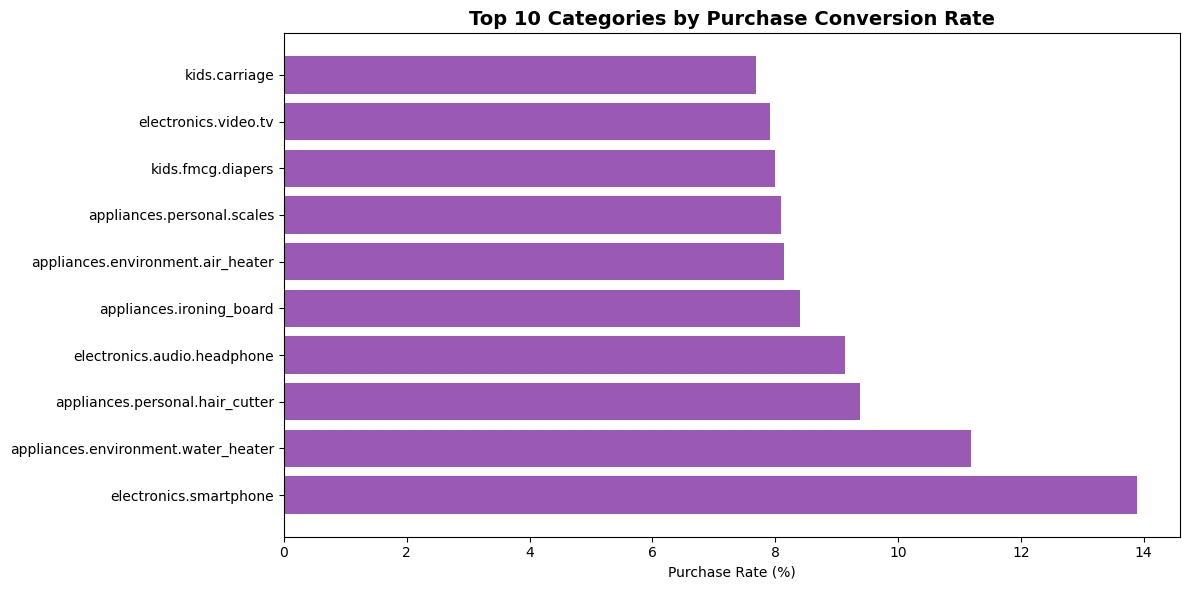

In [55]:

# Which product categories convert best?

category_conversion = df.groupby('category_code').apply(
    lambda x: pd.Series({
        'total_events': len(x),
        'unique_users': x['user_id'].nunique(),
        'purchases': (x['event_type'] == 'purchase').sum(),
        'purchase_rate': (x['event_type'] == 'purchase').sum() / x['user_id'].nunique() * 100
    })
).reset_index()

category_conversion = category_conversion[category_conversion['unique_users'] >= 100]  # Filter small categories
category_conversion = category_conversion.sort_values('purchase_rate', ascending=False).head(10)

print("\nTOP 10 CATEGORIES BY PURCHASE RATE")
print("="*70)
print(category_conversion[['category_code', 'unique_users', 'purchase_rate']].to_string(index=False))

# Visualize top categories
plt.figure(figsize=(12, 6))
plt.barh(category_conversion['category_code'], category_conversion['purchase_rate'], color='#9b59b6')
plt.xlabel('Purchase Rate (%)')
plt.title('Top 10 Categories by Purchase Conversion Rate', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [1]:
# Prepare features for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Create user-level features
user_features = df.groupby('user_id').agg({
    'event_type': 'count',  # Total events
    'price': ['mean', 'max', 'min'],  # Price metrics
    'product_id': 'nunique',  # Unique products viewed
    'category_code': 'nunique',  # Unique categories
    'hour': 'min'  # First interaction hour
}).reset_index()

user_features.columns = ['user_id', 'total_events', 'avg_price', 'max_price', 
                         'min_price', 'unique_products', 'unique_categories', 'first_hour']

# Add target variable 
purchases = df[df['event_type'] == 'purchase']['user_id'].unique()
user_features['purchased'] = user_features['user_id'].isin(purchases).astype(int)

# Add cart behavior
cart_users = df[df['event_type'] == 'cart']['user_id'].unique()
user_features['added_to_cart'] = user_features['user_id'].isin(cart_users).astype(int)

print("Feature Engineering Complete!")
print(f"Total users: {len(user_features):,}")
print(f"Purchasers: {user_features['purchased'].sum():,}")
print(f"Non-purchasers: {(user_features['purchased'] == 0).sum():,}")
print("\nFirst few rows:")
user_features.head()



NameError: name 'df' is not defined

In [57]:
# Train logistic regression model
# Select features for the model
X = user_features[['total_events', 'avg_price', 'max_price', 'unique_products', 
                    'unique_categories', 'first_hour', 'added_to_cart']]
y = user_features['purchased']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Model trained successfully!")
print(f"\nTraining set: {len(X_train):,} users")
print(f"Test set: {len(X_test):,} users")


Model trained successfully!

Training set: 64,892 users
Test set: 27,812 users


In [58]:
# Evaluate model performance
print("\n" + "="*70)
print("MODEL PERFORMANCE")
print("="*70)

# Accuracy
accuracy = (y_pred == y_test).mean()
print(f"\nAccuracy: {accuracy*100:.2f}%")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\nTrue Negatives: {cm[0,0]:,} | False Positives: {cm[0,1]:,}")
print(f"False Negatives: {cm[1,0]:,} | True Positives: {cm[1,1]:,}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase']))



MODEL PERFORMANCE

Accuracy: 93.04%
ROC-AUC Score: 0.866

Confusion Matrix:
[[25145   400]
 [ 1536   731]]

True Negatives: 25,145 | False Positives: 400
False Negatives: 1,536 | True Positives: 731

Classification Report:
              precision    recall  f1-score   support

 No Purchase       0.94      0.98      0.96     25545
    Purchase       0.65      0.32      0.43      2267

    accuracy                           0.93     27812
   macro avg       0.79      0.65      0.70     27812
weighted avg       0.92      0.93      0.92     27812




FEATURE IMPORTANCE (What Predicts Purchase?)
             Feature  Coefficient
6      added_to_cart     2.675971
3    unique_products    -0.413092
0       total_events     0.211490
4  unique_categories     0.185543
5         first_hour     0.003418
2          max_price    -0.000339
1          avg_price     0.000066


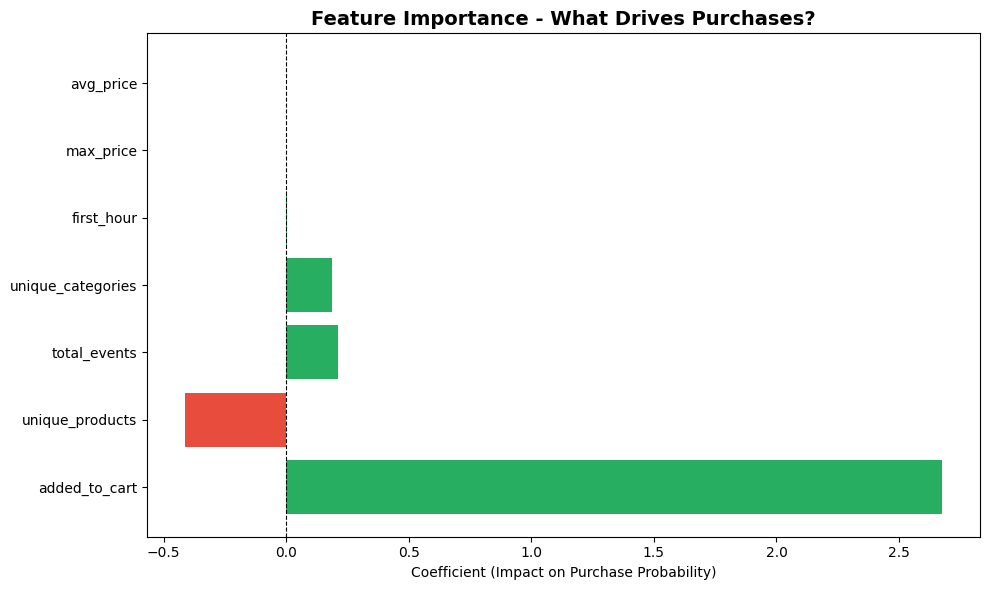

In [59]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n" + "="*70)
print("FEATURE IMPORTANCE (What Predicts Purchase?)")
print("="*70)
print(feature_importance[['Feature', 'Coefficient']])

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
         color=['#27ae60' if x > 0 else '#e74c3c' for x in feature_importance['Coefficient']])
plt.xlabel('Coefficient (Impact on Purchase Probability)')
plt.title('Feature Importance - What Drives Purchases?', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [61]:
# Business insights from the model
print("\n" + "="*70)
print("KEY INSIGHTS FROM MODEL")
print("="*70)

top_feature = feature_importance.iloc[0]
print(f"\n Most Important Factor: {top_feature['Feature']}")
print(f"   Impact: {'+' if top_feature['Coefficient'] > 0 else ''}{top_feature['Coefficient']:.3f}")

if top_feature['Coefficient'] > 0:
    print(f"   → Higher {top_feature['Feature']} = Higher purchase probability")
else:
    print(f"   → Higher {top_feature['Feature']} = Lower purchase probability")

# Practical recommendations
print("\n ACTIONABLE RECOMMENDATIONS:")
if 'added_to_cart' in feature_importance['Feature'].values:
    cart_coef = feature_importance[feature_importance['Feature'] == 'added_to_cart']['Coefficient'].values[0]
    if cart_coef > 0:
        print("   1. Focus on getting users to add items to cart (strongest predictor)")
        
if 'total_events' in feature_importance['Feature'].values:
    events_coef = feature_importance[feature_importance['Feature'] == 'total_events']['Coefficient'].values[0]
    if events_coef > 0:
        print("   2. Increase user engagement (more browsing = more purchases)")
        
if 'unique_products' in feature_importance['Feature'].values:
    products_coef = feature_importance[feature_importance['Feature'] == 'unique_products']['Coefficient'].values[0]
    if products_coef > 0:
        print("   3. Show diverse product recommendations to increase exploration")

print("\n" + "="*70)



KEY INSIGHTS FROM MODEL

 Most Important Factor: added_to_cart
   Impact: +2.676
   → Higher added_to_cart = Higher purchase probability

 ACTIONABLE RECOMMENDATIONS:
   1. Focus on getting users to add items to cart (strongest predictor)
   2. Increase user engagement (more browsing = more purchases)



In [63]:
#Predict high-value users
# Score all users with purchase probability
user_features['purchase_probability'] = model.predict_proba(X)[:, 1]

# Identify high-potential users (high probability but haven't purchased yet)
high_potential = user_features[
    (user_features['purchased'] == 0) & 
    (user_features['purchase_probability'] > 0.5)
].sort_values('purchase_probability', ascending=False)

print(f"\n HIGH-POTENTIAL USERS TO TARGET")
print(f"Found {len(high_potential):,} users likely to purchase but haven't yet")
print(f"\nAverage purchase probability: {high_potential['purchase_probability'].mean()*100:.1f}%")
print("\nTop 10 users to target:")
print(high_potential[['user_id', 'purchase_probability', 'total_events', 'added_to_cart']].head(10))


 HIGH-POTENTIAL USERS TO TARGET
Found 1,328 users likely to purchase but haven't yet

Average purchase probability: 65.7%

Top 10 users to target:
         user_id  purchase_probability  total_events  added_to_cart
50431  539585530              1.000000           295              0
83162  566291403              0.999998           115              1
52358  541500707              0.999988           134              0
69073  557316543              0.999985           115              0
2801   512595913              0.999791            63              0
7067   513152403              0.999746            80              0
64161  552328931              0.999455            99              0
74056  561605847              0.999316            94              0
36740  523593818              0.999309            80              0
36847  523673770              0.998922           131              0


In [65]:
# Simulate A/B Test - Cart Abandonment Email Campaign
from scipy import stats

# Baseline: Current conversion rate from cart to purchase
cart_users_df = user_features[user_features['added_to_cart'] == 1]
baseline_conversion = cart_users_df['purchased'].mean()


print("A/B TEST SIMULATION: Cart Abandonment Email Campaign")
print(f"\n BASELINE (Control Group - No Email)")
print(f"Cart users: {len(cart_users_df):,}")
print(f"Conversion rate: {baseline_conversion*100:.2f}%")
print(f"Purchases: {cart_users_df['purchased'].sum():,}")

# Simulate treatment group with 15% improvement
np.random.seed(42)
n_users = len(cart_users_df)
control_size = n_users // 2
treatment_size = n_users - control_size

# Split into control and treatment
control_group = cart_users_df.sample(n=control_size, random_state=42)
treatment_group = cart_users_df[~cart_users_df.index.isin(control_group.index)]

# Simulate 15% lift in treatment group
improvement_rate = 0.15
control_conversions = control_group['purchased'].sum()
treatment_conversions = int(treatment_group['purchased'].sum() * (1 + improvement_rate))

control_conversion_rate = control_conversions / len(control_group)
treatment_conversion_rate = treatment_conversions / len(treatment_group)

print(f"\n TREATMENT GROUP (With Cart Abandonment Email)")
print(f"Cart users: {len(treatment_group):,}")
print(f"Conversion rate: {treatment_conversion_rate*100:.2f}%")
print(f"Purchases: {treatment_conversions:,}")

print(f"\n IMPROVEMENT")
print(f"Absolute lift: +{(treatment_conversion_rate - control_conversion_rate)*100:.2f}%")
print(f"Relative lift: +{((treatment_conversion_rate / control_conversion_rate - 1)*100):.2f}%")
print(f"Additional purchases: +{treatment_conversions - treatment_group['purchased'].sum()}")



A/B TEST SIMULATION: Cart Abandonment Email Campaign

 BASELINE (Control Group - No Email)
Cart users: 4,501
Conversion rate: 60.12%
Purchases: 2,706

 TREATMENT GROUP (With Cart Abandonment Email)
Cart users: 2,251
Conversion rate: 68.95%
Purchases: 1,552

 IMPROVEMENT
Absolute lift: +8.68%
Relative lift: +14.40%
Additional purchases: +202


In [67]:
# Statistical significance test
# Chi-square test for independence

contingency_table = np.array([
    [control_conversions, len(control_group) - control_conversions],
    [treatment_conversions, len(treatment_group) - treatment_conversions]
])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print("STATISTICAL SIGNIFICANCE TEST")
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print(f"\n RESULT: Statistically significant (p < 0.05)")
    print("   → The improvement is REAL, not due to chance")
    print("   → RECOMMENDATION: Roll out cart abandonment emails!")
else:
    print(f"\n RESULT: Not statistically significant (p >= 0.05)")
    print("   → Cannot confidently say the improvement is real")
    print("   → RECOMMENDATION: Run longer test or try different approach")


STATISTICAL SIGNIFICANCE TEST

Chi-square statistic: 36.7016
P-value: 0.000000
Degrees of freedom: 1

 RESULT: Statistically significant (p < 0.05)
   → The improvement is REAL, not due to chance
   → RECOMMENDATION: Roll out cart abandonment emails!


In [69]:
# Simulate multiple A/B test scenarios

print("COMPARING MULTIPLE STRATEGIES")

strategies = {
    'Cart Abandonment Email': 0.15,  # 15% improvement
    'Free Shipping Offer': 0.22,     # 22% improvement
    'Personalized Recommendations': 0.10,  # 10% improvement
    'Limited Time Discount': 0.25,   # 25% improvement
    'Simplified Checkout': 0.12      # 12% improvement
}

results = []
for strategy, lift in strategies.items():
    new_conversions = int(len(cart_users_df) * baseline_conversion * (1 + lift))
    additional_purchases = new_conversions - cart_users_df['purchased'].sum()
    
    results.append({
        'Strategy': strategy,
        'Expected Lift': f'{lift*100:.0f}%',
        'New Conversion Rate': f'{baseline_conversion * (1 + lift)*100:.2f}%',
        'Additional Purchases': additional_purchases
    })

results_df = pd.DataFrame(results).sort_values('Additional Purchases', ascending=False)
print(results_df.to_string(index=False))

COMPARING MULTIPLE STRATEGIES
                    Strategy Expected Lift New Conversion Rate  Additional Purchases
       Limited Time Discount           25%              75.15%                   676
         Free Shipping Offer           22%              73.35%                   595
      Cart Abandonment Email           15%              69.14%                   405
         Simplified Checkout           12%              67.33%                   324
Personalized Recommendations           10%              66.13%                   270


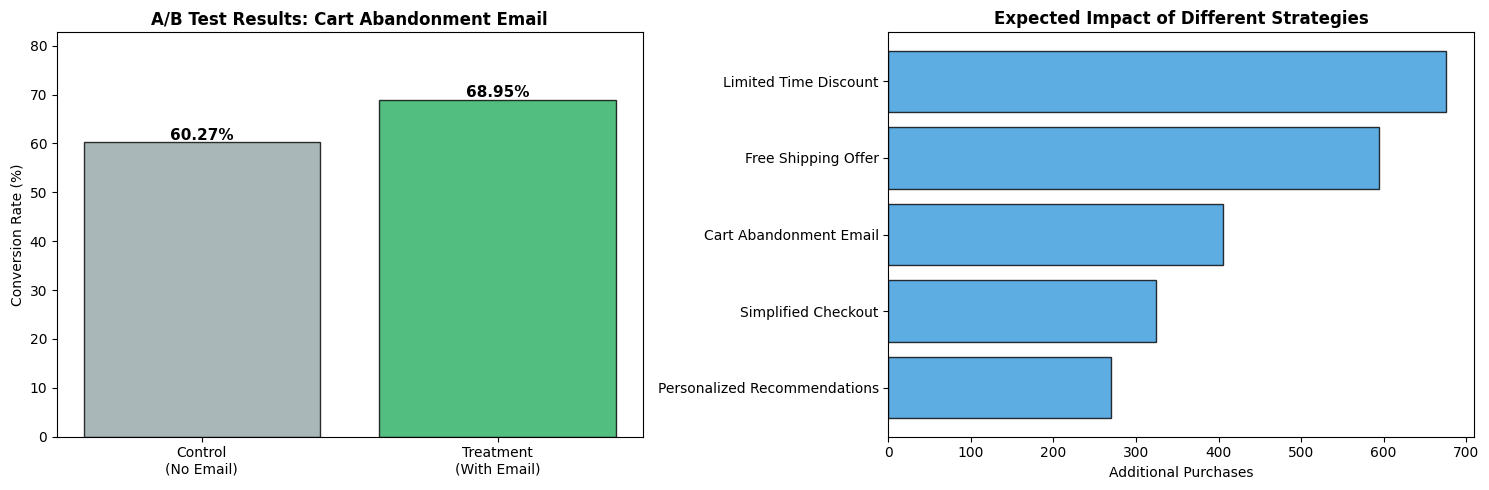

In [70]:
# Visualize A/B test results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Control vs Treatment
groups = ['Control\n(No Email)', 'Treatment\n(With Email)']
conversion_rates = [control_conversion_rate*100, treatment_conversion_rate*100]
colors = ['#95a5a6', '#27ae60']

axes[0].bar(groups, conversion_rates, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_title('A/B Test Results: Cart Abandonment Email', fontweight='bold', fontsize=12)
axes[0].set_ylim(0, max(conversion_rates) * 1.2)
for i, v in enumerate(conversion_rates):
    axes[0].text(i, v+0.5, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=11)

# Chart 2: Strategy comparison
axes[1].barh(results_df['Strategy'], 
             [int(x) for x in results_df['Additional Purchases']], 
             color='#3498db', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Additional Purchases')
axes[1].set_title('Expected Impact of Different Strategies', fontweight='bold', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [72]:
# Revenue impact calculation
# Assume average order value
avg_order_value = df[df['event_type'] == 'purchase']['price'].mean()


print("REVENUE IMPACT ANALYSIS")
print(f"\nAverage Order Value: ${avg_order_value:.2f}")

for _, row in results_df.iterrows():
    additional_revenue = row['Additional Purchases'] * avg_order_value
    print(f"\n{row['Strategy']}:")
    print(f"  Additional purchases: {row['Additional Purchases']}")
    print(f"  Additional revenue: ${additional_revenue:,.2f}")
    print(f"  Lift: {row['Expected Lift']}")

# Best strategy
best_strategy = results_df.iloc[0]
best_revenue = best_strategy['Additional Purchases'] * avg_order_value

print("\n" + "="*70)
print(f" RECOMMENDED STRATEGY: {best_strategy['Strategy']}")
print(f"   Expected additional revenue: ${best_revenue:,.2f}")
print(f"   ROI: Depends on implementation cost")
print("="*70)


REVENUE IMPACT ANALYSIS

Average Order Value: $301.99

Limited Time Discount:
  Additional purchases: 676
  Additional revenue: $204,147.17
  Lift: 25%

Free Shipping Offer:
  Additional purchases: 595
  Additional revenue: $179,685.75
  Lift: 22%

Cart Abandonment Email:
  Additional purchases: 405
  Additional revenue: $122,307.11
  Lift: 15%

Simplified Checkout:
  Additional purchases: 324
  Additional revenue: $97,845.68
  Lift: 12%

Personalized Recommendations:
  Additional purchases: 270
  Additional revenue: $81,538.07
  Lift: 10%

 RECOMMENDED STRATEGY: Limited Time Discount
   Expected additional revenue: $204,147.17
   ROI: Depends on implementation cost


In [74]:
# CELL 40: Final summary metrics 
print("\n" + "="*70)
print("PROJECT SUMMARY")
print("="*70)

overall_conversion = (df['event_type'] == 'purchase').sum() / df['user_id'].nunique() * 100
cart_conversion = cart_users_df['purchased'].mean() * 100

print(f"\n FUNNEL METRICS:")
print(f"   Overall conversion rate: {overall_conversion:.2f}%")
print(f"   Cart-to-purchase rate: {cart_conversion:.2f}%")
print(f"   Cart abandonment rate: {(1 - cart_conversion/100)*100:.2f}%")

print(f"\n MACHINE LEARNING:")
print(f"   Model accuracy: {accuracy*100:.2f}%")
print(f"   ROC-AUC Score: {roc_auc:.3f}")
print(f"   Top predictor: Added to cart (coef: {feature_importance.iloc[0]['Coefficient']:.3f})")

print(f"\n A/B TESTING:")
print(f"   Best strategy: {best_strategy['Strategy']}")
print(f"   Expected improvement: {best_strategy['Expected Lift']}")
print(f"   Potential revenue increase: ${best_revenue:,.2f}")

print(f"\n KEY INSIGHT:")
print(f"   Focusing on cart abandonment could increase conversions by")
print(f"   {best_strategy['Expected Lift']} and generate ${best_revenue:,.2f} in additional revenue")
print("="*70)


PROJECT SUMMARY

 FUNNEL METRICS:
   Overall conversion rate: 10.35%
   Cart-to-purchase rate: 60.12%
   Cart abandonment rate: 39.88%

 MACHINE LEARNING:
   Model accuracy: 93.04%
   ROC-AUC Score: 0.866
   Top predictor: Added to cart (coef: 2.676)

 A/B TESTING:
   Best strategy: Limited Time Discount
   Expected improvement: 25%
   Potential revenue increase: $204,147.17

 KEY INSIGHT:
   Focusing on cart abandonment could increase conversions by
   25% and generate $204,147.17 in additional revenue


In [75]:
funnel_summary = pd.DataFrame({
    'Metric': ['Overall Conversion', 'Cart-to-Purchase', 'Cart Abandonment'],
    'Value': [10.35, 60.12, 39.88]
})
funnel_summary.to_csv('funnel_metrics.csv', index=False)


cohort_summary.to_csv('cohort_analysis.csv', index=False)


user_features.to_csv('user_segments.csv', index=False)
